# English to Hindi

## Modules

In [ ]:
!pip install langdetect
!pip install stanza
!pip install googletrans==3.1.0a0

In [ ]:
from googletrans import Translator
from langdetect import detect
import pandas as pd
import json
from time import sleep

## For summary

In [ ]:
df = pd.read_csv('Original Summaries.csv')
df.columns = ['Asin','Text','Labels']
df['Labels'] = df['Labels'].apply(lambda x: eval(x))
df = df.dropna(0).reset_index(drop=True)
df.head()

In [ ]:
import numpy as np
df['src'] = np.nan
df['converted'] = np.nan
df['dest'] = np.nan

In [ ]:
def translate(row):
  i,row = row
  text = row.values[1]
  translator = Translator()
  tt = translator.translate(text,dest = 'hi')
  df['src'][i] = tt.src
  df['converted'][i] = tt.text
  df['dest'][i] = detect(tt.text)
  print(i)

In [ ]:
from concurrent.futures import ThreadPoolExecutor
with ThreadPoolExecutor(2) as executor:
  for _ in executor.map(translate,df.iterrows()):
    pass

In [ ]:
df.to_csv('Original Summaries.csv')

## For titles



In [ ]:
df = pd.read_csv('title_summ.csv',index_col=0)
df['genre'] = df['genre'].apply(eval)
df.head()

In [ ]:
def translate(row):
  i,row = row
  text = row['title']
  translator = Translator()
  try: tt = translator.translate(text,dest = 'hi')
  except Exception as e:
    print(e,i,text,7,sep= " : ")
    return
  print(tt.text)
  df['src'][i] = tt.src
  df['converted'][i] = tt.text
  try: df['dest'][i] = detect(tt.text)
  except Exception as e:
    print(e,i,tt.text,14,sep=" : ")

In [ ]:
from concurrent.futures import ThreadPoolExecutor
with ThreadPoolExecutor(2) as executor:
  for _ in executor.map(translate,df[df['dest']!='hi'].sample(frac=1).iterrows()):
    pass

In [ ]:
df[df['dest']!='hi']

In [ ]:
df.to_csv('title_summ.csv')

# Data Processing

In [ ]:
from collections import Counter

In [ ]:
df = pd.read_csv('Original Summaries.csv',index_col=0)
df.head()

,Asin,Text,Labels,src,converted,dest
0,8194653835,‘उफ़्फ़ कोलकाता’ हिंदी भाषा की पहली हॉरर कॉमेडी ...,"['Hindi Horror Novels', 'Hindi Fiction Novels'...",hi,‘उफ़्फ़ कोलकाता’ हिंदी भाषा की पहली हॉरर कॉमेडी ...,hi
1,1644293064,The best pics are those which you probably can...,"['Hindi Horror Novels', 'Hindi Fiction Novels'...",en,सबसे अच्छी तस्वीरें वे हैं जो आप शायद फेसबुक प...,hi
2,9387390292,"दुष्यंत के पास सब कुछ था, वो सब जो एक इंसान को...",['Hindi Horror Novels'],hi,"दुष्यंत के पास सब कुछ था, वो सब जो एक इंसान को...",hi
3,B08XZHNDKC,बड़जात्या खानदान को श्राप था कि उनके परिवार की ...,['Hindi Horror Novels'],hi,बड़जात्या खानदान को श्राप था कि उनके परिवार की ...,hi
4,9386850591,'Dark Horse' is one of the most popular novels...,['Hindi Horror Novels'],en,'डार्क हॉर्स' हिंदी में लिखे गए इस दशक के सबसे...,hi


In [ ]:
df.shape

(1514, 6)

In [ ]:
df.drop(['Asin','Text','src','dest'],1,inplace=True)
df = df[['converted','Labels']]
df.columns = ['text','class']
df['class'] = df['class'].apply(eval)
df

,text,class
0,‘उफ़्फ़ कोलकाता’ हिंदी भाषा की पहली हॉरर कॉमेडी ...,"[Hindi Horror Novels, Hindi Fiction Novels, Hi..."
1,सबसे अच्छी तस्वीरें वे हैं जो आप शायद फेसबुक प...,"[Hindi Horror Novels, Hindi Fiction Novels, Hi..."
2,"दुष्यंत के पास सब कुछ था, वो सब जो एक इंसान को...",[Hindi Horror Novels]
3,बड़जात्या खानदान को श्राप था कि उनके परिवार की ...,[Hindi Horror Novels]
4,'डार्क हॉर्स' हिंदी में लिखे गए इस दशक के सबसे...,[Hindi Horror Novels]
...,...,...
1137,"""पुलिस लव स्टोरी"" यह एक ईमानदार पुलिस अधिकारी ...",[Hindi Romantic Novels]
1152,फ़ातिमा मुल्क की सबसे मशहूर इलेक्ट्रॉनिक्स कंपन...,"[Hindi Romantic Novels, Hindi Comedy Novels]"
1321,भामतीसाहित्य अकादमी पुरस्कार से सम्मानित ‘भामत...,[Hindi Historical Novels]
1352,ये कहानी ग्यारहवीं शताब्दी के एक ऐसे भारतीय रा...,[Hindi Historical Novels]


In [ ]:
df.explode('class')['class'].unique()

array(['Hindi Horror Novels', 'Hindi Fiction Novels',
       'Hindi Comedy Novels', 'Hindi Romantic Novels',
       'Hindi Historical Novels'], dtype=object)

In [ ]:
import stanza
stanza.download('hi')       # This downloads the English models for the neural pipeline
nlp = stanza.Pipeline('hi') # This sets up a default neural pipeline in English

2021-04-08 08:47:39 INFO: Downloading default packages for language: hi (Hindi)...
2021-04-08 08:48:17 INFO: Finished downloading models and saved to /root/stanza_resources.
2021-04-08 08:48:17 INFO: Loading these models for language: hi (Hindi):
| Processor | Package |
-----------------------
| tokenize  | hdtb    |
| pos       | hdtb    |
| lemma     | hdtb    |
| depparse  | hdtb    |

2021-04-08 08:48:17 INFO: Use device: cpu
2021-04-08 08:48:17 INFO: Loading: tokenize
2021-04-08 08:48:17 INFO: Loading: pos
2021-04-08 08:48:18 INFO: Loading: lemma
2021-04-08 08:48:18 INFO: Loading: depparse
2021-04-08 08:48:18 INFO: Done loading processors!


In [ ]:
# with open("final_stopwords.txt") as f:
#   stopwords = f.read().splitlines()
# print(stopwords)

stopwords = ['मैं', 'मुझको', 'मेरा', 'अपने आप को', 'हमने', 'हमारा', 'अपना', 'हम', 'आप', 'आपका', 'तुम्हारा', 'अपने आप', 'स्वयं', 'वह', 'इसे', 'उसके',
          'खुद को', 'कि वह', 'उसकी','उसका', 'खुद ही', 'यह', 'इसके', 'उन्होने', 'अपने', 'क्या', 'जो', 'किसे', 'किसको', 'कि', 'ये', 'हूँ', 'होता है',
          'रहे', 'थी', 'थे', 'होना', 'गया', 'किया जा रहा है', 'किया है', 'है', 'पडा', 'होने', 'करना', 'करता है', 'किया', 'रही', 'एक', 'लेकिन', 'अगर',
          'या', 'क्यूंकि', 'जैसा', 'जब तक', 'जबकि', 'की', 'पर', 'द्वारा', 'के लिए', 'साथ', 'के बारे में', 'खिलाफ', 'बीच', 'में', 'के माध्यम से', 'दौरान',
          'से पहले', 'के बाद', 'ऊपर', 'नीचे', 'को', 'से', 'तक', 'से नीचे', 'करने में', 'निकल', 'बंद', 'से अधिक', 'तहत', 'दुबारा', 'आगे', 'फिर', 'एक बार',
          'यहाँ', 'वहाँ', 'कब', 'कहाँ', 'क्यों', 'कैसे', 'सारे', 'किसी', 'दोनो', 'प्रत्येक', 'ज्यादा', 'अधिकांश', 'अन्य', 'में कुछ', 'ऐसा', 'में कोई', 'मात्र', 'खुद',
          'समान', 'इसलिए', 'बहुत', 'सकता', 'जायेंगे', 'जरा', 'चाहिए', 'अभी', 'और', 'कर दिया', 'रखें', 'का', 'हैं', 'इस', 'होता', 'करने', 'ने', 'बनी', 'तो',
          'ही', 'हो', 'इसका', 'था', 'हुआ', 'वाले', 'बाद', 'लिए', 'सकते', 'इसमें', 'दो', 'वे', 'करते', 'कहा', 'वर्ग', 'कई', 'करें', 'होती', 'अपनी', 'उनके',
          'यदि', 'हुई', 'जा', 'कहते', 'जब', 'होते', 'कोई', 'हुए', 'व', 'जैसे', 'सभी', 'करता', 'उनकी', 'तरह', 'उस', 'आदि', 'इसकी', 'उनका', 'इसी', 'पे',
          'तथा', 'भी', 'परंतु', 'इन', 'कम', 'दूर', 'पूरे', 'गये', 'तुम', 'मै', 'यहां', 'हुये', 'कभी', 'अथवा', 'गयी', 'प्रति', 'जाता', 'इन्हें', 'गई', 'अब', 
          'जिसमें','लिया', 'बड़ा', 'जाती', 'तब', 'उसे', 'जाते', 'लेकर', 'बड़े', 'दूसरे', 'जाने', 'बाहर', 'स्थान', 'उन्हें ', 'गए', 'ऐसे', 'जिससे', 'समय',
          'दोनों', 'किए','रहती', 'इनके', 'इनका', 'इनकी', 'सकती', 'आज', 'कल', 'जिन्हें', 'जिन्हों', 'तिन्हें', 'तिन्हों', 'किन्हों', 'किन्हें', 'इत्यादि', 'इन्हों',
          'उन्हों', 'बिलकुल','निहायत', 'इन्हीं', 'उन्हीं', 'जितना', 'दूसरा', 'कितना', 'साबुत', 'वग़ैरह', 'कौनसा', 'लिये', 'दिया', 'जिसे', 'तिसे', 'काफ़ी', 'पहले',
          'बाला', 'मानो', 'अंदर', 'भीतर', 'पूरा', 'सारा', 'उनको', 'वहीं', 'जहाँ', 'जीधर', '\ufeffके', 'एवं', 'कुछ', 'कुल', 'रहा', 'जिस', 'जिन', 'तिस',
          'तिन', 'कौन', 'किस', 'संग', 'यही', 'बही', 'उसी', 'मगर', 'कर', 'मे', 'एस', 'उन', 'सो', 'अत']

In [ ]:
df['stanza'] = df['text'].apply(lambda x: nlp(x).to_dict())

In [ ]:
df

,text,class,stanza
0,‘उफ़्फ़ कोलकाता’ हिंदी भाषा की पहली हॉरर कॉमेडी ...,"[Hindi Horror Novels, Hindi Fiction Novels, Hi...","[[{'id': 1, 'text': '‘उफ़्फ़', 'lemma': '‘उफ़्फ़',..."
1,सबसे अच्छी तस्वीरें वे हैं जो आप शायद फेसबुक प...,"[Hindi Horror Novels, Hindi Fiction Novels, Hi...","[[{'id': 1, 'text': 'सबसे', 'lemma': 'सबसे', '..."
2,"दुष्यंत के पास सब कुछ था, वो सब जो एक इंसान को...",[Hindi Horror Novels],"[[{'id': 1, 'text': 'दुष्यंत', 'lemma': 'दुष्य..."
3,बड़जात्या खानदान को श्राप था कि उनके परिवार की ...,[Hindi Horror Novels],"[[{'id': 1, 'text': 'बड़जात्या', 'lemma': 'बड़जा..."
4,'डार्क हॉर्स' हिंदी में लिखे गए इस दशक के सबसे...,[Hindi Horror Novels],"[[{'id': 1, 'text': ''', 'lemma': 'SINGLE_QUOT..."
...,...,...,...
1137,"""पुलिस लव स्टोरी"" यह एक ईमानदार पुलिस अधिकारी ...",[Hindi Romantic Novels],"[[{'id': 1, 'text': '""', 'lemma': '""', 'upos':..."
1152,फ़ातिमा मुल्क की सबसे मशहूर इलेक्ट्रॉनिक्स कंपन...,"[Hindi Romantic Novels, Hindi Comedy Novels]","[[{'id': 1, 'text': 'फ़ातिमा', 'lemma': 'फ़ातिमा..."
1321,भामतीसाहित्य अकादमी पुरस्कार से सम्मानित ‘भामत...,[Hindi Historical Novels],"[[{'id': 1, 'text': 'भामतीसाहित्य', 'lemma': '..."
1352,ये कहानी ग्यारहवीं शताब्दी के एक ऐसे भारतीय रा...,[Hindi Historical Novels],"[[{'id': 1, 'text': 'ये', 'lemma': 'यह', 'upos..."


In [ ]:
df['stanLemma'] = df['stanza'].apply(lambda x: " ".join([j['lemma'] for i in x for j in i if j['upos']!='PUNCT' and  j['text'] not in stopwords and j['lemma'] not in stopwords]))

In [ ]:
df1 = df.copy()
df1 = df1.explode('class')
df1.reset_index(inplace=True,drop=True)
df1.head()

,text,class,stanza,stanLemma
0,‘उफ़्फ़ कोलकाता’ हिंदी भाषा की पहली हॉरर कॉमेडी ...,Hindi Horror Novels,"[[{'id': 1, 'text': '‘उफ़्फ़', 'lemma': '‘उफ़्फ़',...",‘उफ़्फ़ कोलकाता’ हिंदी भाषा पहला हॉरर कॉमेडी कह ...
1,‘उफ़्फ़ कोलकाता’ हिंदी भाषा की पहली हॉरर कॉमेडी ...,Hindi Fiction Novels,"[[{'id': 1, 'text': '‘उफ़्फ़', 'lemma': '‘उफ़्फ़',...",‘उफ़्फ़ कोलकाता’ हिंदी भाषा पहला हॉरर कॉमेडी कह ...
2,‘उफ़्फ़ कोलकाता’ हिंदी भाषा की पहली हॉरर कॉमेडी ...,Hindi Comedy Novels,"[[{'id': 1, 'text': '‘उफ़्फ़', 'lemma': '‘उफ़्फ़',...",‘उफ़्फ़ कोलकाता’ हिंदी भाषा पहला हॉरर कॉमेडी कह ...
3,सबसे अच्छी तस्वीरें वे हैं जो आप शायद फेसबुक प...,Hindi Horror Novels,"[[{'id': 1, 'text': 'सबसे', 'lemma': 'सबसे', '...",सबसे अच्छा तस्वीर शायद फेसबुक अपलोड नहीं इक आग...
4,सबसे अच्छी तस्वीरें वे हैं जो आप शायद फेसबुक प...,Hindi Fiction Novels,"[[{'id': 1, 'text': 'सबसे', 'lemma': 'सबसे', '...",सबसे अच्छा तस्वीर शायद फेसबुक अपलोड नहीं इक आग...


In [ ]:

classes = { 'Hindi Horror Novels':Counter([]),
            'Hindi Fiction Novels':Counter([]),
            'Hindi Comedy Novels':Counter([]),
            'Hindi Romantic Novels':Counter([]),
            'Hindi Historical Novels':Counter([])
}
for cls in classes:
  tempdf = df1[df1['class']==cls]['stanLemma']
  for row in tempdf:
    row = row.split()
    classes[cls] = classes[cls]+Counter(row)

In [ ]:
classes['Hindi Horror Novels']['हिंदी']/len(classes['Hindi Horror Novels'])

0.006533618436683298

In [ ]:
for cls in classes:
  wordLen = len(classes[cls])
  for j in classes[cls]:
    # temp = classes[cls][j]
    classes[cls][j]={'count':classes[cls][j],'ratio':classes[cls][j]/wordLen}

In [ ]:
classes
{'Hindi Comedy Novels': Counter({'‘उफ़्फ़': {'count': 1,
           'ratio': 0.0001772421127259837},
          'कोलकाता’': {'count': 1, 'ratio': 0.0001772421127259837},
          'हिंदी': {'count': 45, 'ratio': 0.007975895072669267},
          'भाषा': {'count': 22, 'ratio': 0.0038993264799716413},
          'पहला': {'count': 30, 'ratio': 0.005317263381779511},
          'हॉरर': {'count': 2, 'ratio': 0.0003544842254519674},
          'कॉमेडी': {'count': 14, 'ratio': 0.0024813895781637717},
          'कह': {'count': 29, 'ratio': 0.0051400

In [ ]:
df3 = pd.DataFrame(classes)
df3.T

In [ ]:
tclas = {}
for cls in classes:
  for j in classes[cls]:
    tclas[j] = {"Horror Ratio": ,"Fiction Ratio": ,"Comedy Ratio": ,"Romantic Ratio": ,"Historical Ratio": }


In [ ]:
df2 = pd.DataFrame(classes)
df2

,Hindi Horror Novels,Hindi Fiction Novels,Hindi Comedy Novels,Hindi Romantic Novels,Hindi Historical Novels
‘उफ़्फ़,1.0,1.0,1.0,NaN,NaN
कोलकाता’,2.0,1.0,1.0,NaN,NaN
हिंदी,55.0,56.0,45.0,48.0,71.0
भाषा,51.0,52.0,22.0,36.0,32.0
पहला,62.0,71.0,30.0,60.0,44.0
...,...,...,...,...,...
डार,NaN,NaN,NaN,NaN,2.0
कार्टन,NaN,NaN,NaN,NaN,2.0
गुइलोटीन,NaN,NaN,NaN,NaN,1.0
सिटीज़,NaN,NaN,NaN,NaN,1.0


In [ ]:
df2.to_csv('Counts.csv')

In [ ]:
df.to_csv('Stanza-ed.csv')

In [ ]:
df2['wordRatio'] = df

# Model

In [ ]:
stopwords = eval(open("Hindi_StopWords.txt").read())
from matplotlib.font_manager import FontProperties
import matplotlib.patches as mpatches
hindi_font = FontProperties(fname = "/content/Lohit-Devanagari.ttf")

In [ ]:
df = pd.read_csv('/content/Stanza-ed.csv',index_col=0)
df['stanza'] = df['stanza'].apply(eval)
df['class'] = df['class'].apply(eval)
df['stanLemma'] = df['stanLemma'].apply(lambda x: " ".join([i for i in x.split(" ") if i not in stopwords]))
df.head()

,text,class,stanza,stanLemma
0,‘उफ़्फ़ कोलकाता’ हिंदी भाषा की पहली हॉरर कॉमेडी ...,"[Hindi Horror Novels, Hindi Fiction Novels, Hi...","[[{'id': 1, 'text': '‘उफ़्फ़', 'lemma': '‘उफ़्फ़',...",‘उफ़्फ़ कोलकाता’ हिंदी भाषा पहला हॉरर कॉमेडी लिह...
1,सबसे अच्छी तस्वीरें वे हैं जो आप शायद फेसबुक प...,"[Hindi Horror Novels, Hindi Fiction Novels, Hi...","[[{'id': 1, 'text': 'सबसे', 'lemma': 'सबसे', '...",अच्छा तस्वीर शायद फेसबुक अपलोड इक आगाज तस्वीर ...
2,"दुष्यंत के पास सब कुछ था, वो सब जो एक इंसान को...",[Hindi Horror Novels],"[[{'id': 1, 'text': 'दुष्यंत', 'lemma': 'दुष्य...",दुष्यंत इंसान जी बस ‘सुकून’| माता-पिता अकस्मात...
3,बड़जात्या खानदान को श्राप था कि उनके परिवार की ...,[Hindi Horror Novels],"[[{'id': 1, 'text': 'बड़जात्या', 'lemma': 'बड़जा...",बड़जात्या खानदान श्राप परिवार बेटी सात फेरा अगल...
4,'डार्क हॉर्स' हिंदी में लिखे गए इस दशक के सबसे...,[Hindi Horror Novels],"[[{'id': 1, 'text': ''', 'lemma': 'SINGLE_QUOT...",डार्क हॉर्स हिंदी लिख दशक लोकप्रिय उपन्यास हिं...


In [ ]:
mainDf = df[['stanLemma','class']].explode('class').reset_index(drop=True)
mainDf.head()

,stanLemma,class
0,‘उफ़्फ़ कोलकाता’ हिंदी भाषा पहला हॉरर कॉमेडी लिह...,Hindi Horror Novels
1,‘उफ़्फ़ कोलकाता’ हिंदी भाषा पहला हॉरर कॉमेडी लिह...,Hindi Fiction Novels
2,‘उफ़्फ़ कोलकाता’ हिंदी भाषा पहला हॉरर कॉमेडी लिह...,Hindi Comedy Novels
3,अच्छा तस्वीर शायद फेसबुक अपलोड इक आगाज तस्वीर ...,Hindi Horror Novels
4,अच्छा तस्वीर शायद फेसबुक अपलोड इक आगाज तस्वीर ...,Hindi Fiction Novels


In [ ]:
horrorWords = Counter([j for i in mainDf[mainDf['class']=="Hindi Horror Novels"]['stanLemma'].to_list() for j in i.split(" ")])
fictionWords = Counter([j for i in mainDf[mainDf['class']=="Hindi Fiction Novels"]['stanLemma'].to_list() for j in i.split(" ") ])
romanceWords = Counter([j for i in mainDf[mainDf['class']=="Hindi Romantic Novels"]['stanLemma'].to_list() for j in i.split(" ") ])
historicalWords = Counter([j for i in mainDf[mainDf['class']=="Hindi Historical Novels"]['stanLemma'].to_list() for j in i.split(" ") ])
comedyWords = Counter([j for i in mainDf[mainDf['class']=="Hindi Comedy Novels"]['stanLemma'].to_list() for j in i.split(" ") ])

In [ ]:
romanceWords.most_common(10)

[('प्यार', 394),
 ('कहानी', 393),
 ('जीवन', 224),
 ('उपन्यास', 207),
 ('आ', 189),
 ('मिल', 136),
 ('प्रेम', 131),
 ('लिख', 125),
 ('देख', 124),
 ('रूप', 118)]

In [ ]:
freq_word = {}
for i,j in romanceWords.most_common(20):
  freq_word[i] = j

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 108 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 112 missing from current font.
  font.set_text(s, 0.0, flags=flags)


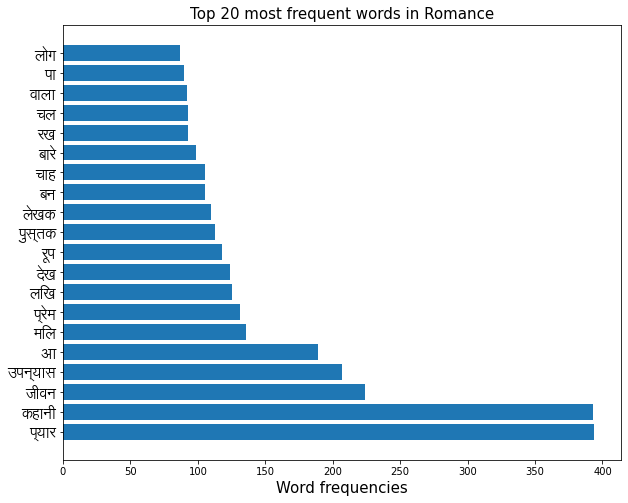

In [ ]:
freq_df=pd.DataFrame(list(freq_word.items()), index=range(20), columns=['word', 'freq']) 
fig, ax = plt.subplots(figsize=(10,8))
ax.barh(freq_df['word'], freq_df['freq'], align='center')
ax.set_xlabel('Word frequencies', fontsize = 15)
ax.set_title('Top 20 most frequent words in Romance', fontsize = 15)
plt.yticks(range(len(freq_word.keys())),list(freq_word.keys()), fontproperties=hindi_font, fontsize = 15);

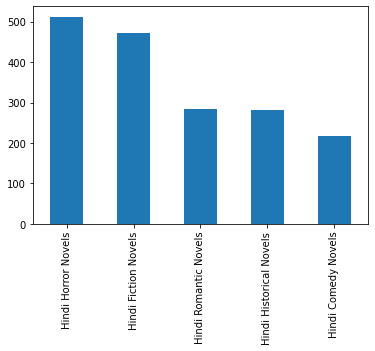

In [ ]:
mainDf['class'].value_counts().plot.bar()

In [ ]:
mainDf['stanLemma'][0]

'‘उफ़्फ़ कोलकाता’ हिंदी भाषा पहला हॉरर कॉमेडी कह लिहाज़ पहल कोलकाता बाहरी भाग फैल विश्वविद्यालय हॉस्टल उपन्यास मुख्य किरदार ग़लती अभिशप्त आत्मा हॉस्टल बच्चा परेशान मार नहीं पसोपेश डर बच इंतज़ामात हास्य उत्पन्न कहानी मूल कहानी खत्म हतप्रभ दे वाला मोड़ ले सत्य व्यास कहानी जान'

In [ ]:
text = " ".join(df.stanLemma.to_list())
text

'‘उफ़्फ़ कोलकाता’ हिंदी भाषा पहला हॉरर कॉमेडी लिहाज़ पहल कोलकाता बाहरी भाग फैल विश्वविद्यालय हॉस्टल उपन्यास मुख्य किरदार ग़लती अभिशप्त आत्मा हॉस्टल बच्चा परेशान मार पसोपेश डर बच इंतज़ामात हास्य उत्पन्न कहानी मूल कहानी खत्म हतप्रभ वाला मोड़ सत्य व्यास कहानी जान अच्छा तस्वीर शायद फेसबुक अपलोड इक आगाज तस्वीर कहानी कैमरा पोज़ बस पकड दुष्यंत इंसान जी बस ‘सुकून’| माता-पिता अकस्मात मृत्यु पश्चात जी वजह बच निर्णय देह-लीला समाप्त निर्णय| बस ख़त्म वाला मित्र जी वजह दुष्यंत आत्महत्या इरादा त्याग मित्र परेशानी निकाल उद्देश्य फैसला दुष्यंत पता लकुआ खाई गिरने’ वाला कहावत चरितार्थ मित्र देव असाधारण घटना भूत-प्रेत सम्बंधित लग हर गु\u200dर पल दुष्यंत उलझ शीघ्र दुष्यंत दोराहा खु बढ लगभग नामुमकिन मुकाबला साधारण आत्मा सामने कर्ण-पिशाचिनी शक्ति निलवंती ग्रन्थ जुड किवदंति सुलझा ‘सुकून’ सिर्फ उपन्यास चमत्कारी यात्रा कर्ण-पिशाचिनी सम्बंधित रहस्य पर्दा उठा डर रोमांच हर पन्ना शब्द माध्यम दिल दिमाग छा वाला बड़जात्या खानदान श्राप परिवार बेटी सात फेरा अगला पल विधवा पीिी आ अमृता बड़जात्या विवाह रस्म शुरू कुनबा मिल श्राप म

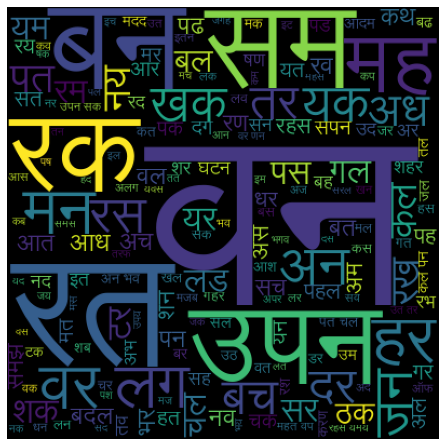

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
%matplotlib inline
wordcloud = WordCloud(font_path='Lohit-Devanagari.ttf',width = 400, height = 400, background_color ='black', min_font_size = 10,stopwords=stopwords).generate(text) 
# plot the WordCloud image 
plt.figure(figsize = (6, 6), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0)
plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=10)
features = tfidf.fit_transform(mainDf.stanLemma).toarray()
labels = mainDf['class']
features.shape

(1767, 776)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
X_train, X_test, y_train, y_test = train_test_split(mainDf['stanLemma'], mainDf['class'], random_state = 42)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = MultinomialNB().fit(X_train_tfidf, y_train)
y_pred = clf.predict(count_vect.transform(X_test))

In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, target_names=mainDf['class'].unique()))

                         precision    recall  f1-score   support

    Hindi Horror Novels       0.00      0.00      0.00        48
   Hindi Fiction Novels       0.31      0.65      0.42       113
    Hindi Comedy Novels       0.62      0.07      0.13        67
  Hindi Romantic Novels       0.47      0.62      0.54       144
Hindi Historical Novels       0.25      0.01      0.03        70

               accuracy                           0.38       442
              macro avg       0.33      0.27      0.22       442
           weighted avg       0.37      0.38      0.31       442



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
metrics.accuracy_score(y_test, y_pred)

0.38235294117647056

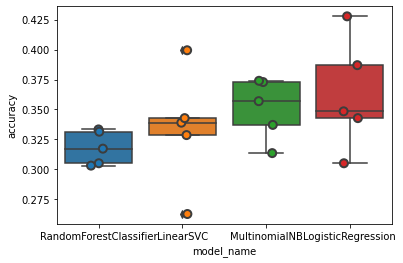

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [ ]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.334503
LogisticRegression        0.362214
MultinomialNB             0.350886
RandomForestClassifier    0.318052
Name: accuracy, dtype: float64

In [ ]:
df.to_csv('download_hindi_stanza.csv')